<h1><center>cs1001.py , Tel Aviv University, Winter 2018-2019</center></h1>
<img src="http://www.pngall.com/wp-content/uploads/2016/05/Python-Logo-PNG-Image-180x180.png" width=50/>

# Recitation 6

Recursion recursion recursion!

We saw two recursive functions for finding the maximal element in a list.
We discussed quicksort.
Then we wrote two recursive functions: binom and change.
We also discussed memoization and demonstrated it using our recursive implementations for binom and change.


#### Takeaways:
<u>Recursion:</u>
- The recursive algorithms we've seen have a similar structure. Given a problem to solve recursively:
    - Find the cases where the problem is solved easily (base cases, halting conditions)
    - Find a method of taking a big problem and reducing it to (one ore more) smaller problems
    - Find how to relate the solution to the smaller problems into the big problem
- The recursion tree helps in bounding the recursion depth and time complexity. Each tree node represents a call to the recursive function. We write the relevant size of the input inside the tree node, and for each node we also keep the total amount of work done for this input, not including the time spent on the recursive call.
- The recursion depth of a recursive function is the maximal number of open recursive calls at a given moment. Note that python has a limit on this value. Analyzing the recursion depth is analogous to computing the length of the longest root-leaf path in the recursion tree.
- The time complexity of a recursive function is the total amount of work performed by all the tree nodes.
- The space complexity of a recursive function is the total amount of space used by the "heaviest" root-leaf path in the tree.

<u>Memoization:</u>
- Memoization is mainly technical. Remember the main steps of defining an envelope function, deciding what keys you use to describe the input, 
and finally changing your recursive implementation so that it will search for the key in the dictionary before making the recursive calls, and save the key:value pair after obtaining the value for a certain input. 
- The keys of the dictionary should be chosen to represent the current input to the function in a one-to-one fashion.
- When analyzing the time complexity of a recursive function with memoization, consider the recursion tree and remember that a node that has already been computed will not have a subtree.

#### Code for printing several outputs in one cell (not part of the recitation):

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Binary Search

Question from an exam: 

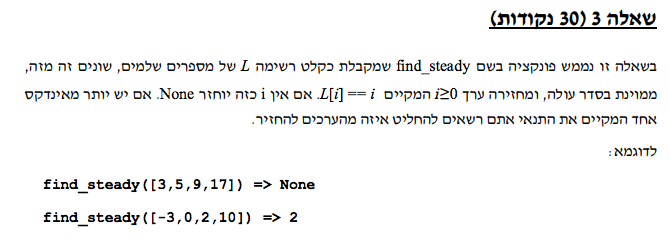

Implement find_steady, a function that receives a list $L$ of sorted (ascending) unique integers, and returns a value $i \geq 0$ s.t. $L[i] == i$. If there is no such $i$, None is returned. If there is more than one such index, any one of them can be returned.

For example:  
find_steady([3, 5, 9, 17]) => None  
find_steady([-3, 0, 2, 10]) => 2

### Naive solution

In [1]:
def find_steady(lst):
    for i in range(len(lst)):
        if lst[i] == i:
            return i
    
    return None

print(find_steady([3, 5, 9, 17]))
print(find_steady([-3, 0, 2, 10]))

None
2


### Binary search solution

In [2]:
def find_steady(lst):
    n = len(lst)
    left = 0
    right = n-1
    while left <= right:
        middle = (right + left) // 2 # middle rounded down
        if middle == lst[middle]: # item found
            return middle
        elif middle < lst[middle]: # item not in top half
            right = middle - 1
        else: # item not in bottom half
            left = middle + 1

    return None

print(find_steady([3, 5, 9, 17]))
print(find_steady([-3, 0, 2, 10]))

None
2


What just happened? The crucial point about this algorithm is the following: if $lst[mid] > mid$ then a fixed point cannot exist above $mid$. Why is that? 

Assume there exists some $j = mid+k$ for some $k>0$ such that $lst[j] == j$. Note that $lst[mid] \geq mid + 1$. Now, as the elements in $lst$ are unique, we must have $lst[j] == lst[mid + k] \geq mid + k + 1 > j$

A similar argument shows that if $lst[mid] < mid$ then a fixed point cannot exist below $mid$, thus we get the correctness of the algorithm.

### Questions

* What is the worst case running time of each solution?
* What happens to each solution if the list is not guaranteed to be sorted?
* What happens to each solution if the list is not guaranteed to be unique?

In [ ]:
# We would like the function to return 3
print(find_steady([-1, 0, 3, 3, 3]))

## Max1 
The maximum is the maximal value between lst[0] and the result of recursively finding the max in lst[1:].

Let $n$ denote the size of lst.

Recursion depth: $O(n)$

Time complexity: $O(n^2)$

In [3]:
def max1(L): 
    if len(L) == 1:
        return L[0]
    return max(max1(L[1:]), L[0])

max1([2,5,10,2,100,-10])

100

## Max2
The maximum is the maximal value between the result of recursively finding the max in lst[:n//2] and the result of recursively finding the max in lst[n//2:], where $n$ denotes the size of lst.

Recursion depth: $O(\log{n})$

Time complexity: $O(n\log{n})$

In [4]:
def max2(L): 
    if len(L) == 1:
        return L[0]
    l = max2(L[:len(L)//2])
    r = max2(L[len(L)//2:])
    return max(l,r)

max2([2,5,10,2,100,-10])

100

## Now without slicing
Since slicing is a costly action we can do things better. Instead of slicing the list each time we will maintain indices for the "active" part of the list (like we did for binary search) and simply recurse after updating the indices according to the same logic.

We also add envelope functions for a more user-friendly code.

How does time/depth change for each function? 
The depth is clearly unaffected. Time, however, is much better. 

Since we only do $O(1)$ work in the function, the runtime is analogous to computing the size of the tree which is $O(n)$ in both cases.

In [5]:
def max11(L,left,right): 
    if left == right:
        return L[left]
    return max(L[left], max11(L, left + 1, right))

def max22(L, left, right): 
    if left == right:
        return L[left]
    mid = (left + right) // 2
    l = max22(L, left, mid)
    r = max22(L, mid + 1, right)
    return max(l, r)

def max1_slice(L):
    return max11(L, 0, len(L) - 1)

def max2_slice(L):
    return max22(L, 0, len(L) - 1)

## Quick Sort

### The logic
Quicksort has a very simple recursive logic:
* A list of size 1 is trivially sorted
* Otherwise, pick some element $x \in L$ and let:
    * $less = \{y \in L : y < x\}$
    * $eq = \{y \in L : y = x\}$ (note: $eq$ is trivially sorted)
    * $more = \{y \in L : y > x \}$
* Recursively sort $less, more$ and return $less+eq+more$

#### Random:

In [6]:
import random
def quicksort(lst):
    """ quick sort of lst """
    if len(lst) <= 1: 
        return lst
    else:
        pivot = random.choice(lst)         # select a random element from list
        smaller = [elem for elem in lst if elem < pivot] 
        equal = [elem for elem in lst if elem == pivot]      
        greater = [elem for elem in lst if elem > pivot]
        return quicksort(smaller) + equal + quicksort(greater) #two recursive calls

#### Deterministic:

In [7]:
def det_quicksort(lst):
    """ sort using deterministic pivot selection """
    if len(lst) <= 1: 
        return lst
    else:
        pivot = lst[0]      # select first element from list
        smaller = [elem for elem in lst if elem < pivot] 
        equal = [elem for elem in lst if elem == pivot]      
        greater = [elem for elem in lst if elem > pivot]
        return det_quicksort(smaller) + equal + det_quicksort(greater) #two recursive calls

## Analysis

The worst case and best case analyses were discussed in class. It is interesting to note that:
* The worst case for quicksort has a recursion tree similar to that of $max1$, i.e. - in each recursive call we reduce the input size by $1$ giving a running time of $O(n^2)$
* The best case for quicksort has a recursion tree similar to that of $max2$, i.e. - each instance of the function on input of size $n$ recurses twice on inputs of size roughly $n/2$, giving a running time of $O(n \cdot \log n)$

## Subset sum

The subset sum problem is described as follows: given a list of integers $L$ and a value $s \in \mathbb{Z}$, is there a subset $S \subseteq L$ such that: $$\sum_{x \in S} x = s$$ If such an $S$ exists we return True, otherwise False.

Examples: 
* For $L = [4, -7, 12, 5, 1], s = 6$ we will say yes, as $-7+1+12 = 6$ (also, $5+1=6$).
* For $L = [1, 2, 4, 8, 16], s= 32$ we will say no as $\sum_{x \in L} = 31$


## The recursive structure

The base cases are pretty straight-forward:
* If we need to reach $s = 0$ then we have succeeded (i.e. - return True)
* If we need to reach some $s \neq 0$ but $L = []$ then we have failed (i.e. - return False)

What about the recursive call? Well, if $s \neq 0, L \neq []$ then the following holds:
* Either there's a way of "reaching" $s$ by taking the first element in $L$
* Or there's a way of "reaching" $s$ by **not** taking the first element in $L$
* If both of the above fail, there is no way of "reaching" $s$ using $L$

So what do we do? We recursively check if either $L[1:], s - L[0]$ or $L[1:], s$ can be solved, and we only return False if both fail. 

Note that instead of using slicing (e.g. $L[1:]$), we pass an index that indicates our iteration along the list.

Let's code:

In [4]:
def subset_sum(L, s, i=0):
    # Base cases
    if s==0:
        return True
    if i==len(L):
        return False
    # Check both cases
    with_first = subset_sum(L, s-L[i], i+1)
    without_first = subset_sum(L, s, i+1)
    
    # If any of the above succeeds we return True, else False
    return with_first or without_first

# Sanity checks
L1 = [4, -7, 12, 5, 1]
L2 = [1, 2, 4, 8, 16]
s1 = 6
s2 = 32

print(subset_sum(L1, s1, 0))
print(subset_sum(L2, s2, 0))

True
False


### Analysis

What is the running time of the code in relation to the size of the list $|L| = n$?

The recurrence relation is $T(n) = 2 \cdot T(n-1) + O(1)$, which yields $T(n) = 2^n$ (Just like the Hanoi towers solution). 

In class we've seen how to transform recursive algorithms which run in exponential time into iterative algorithms that run in linear time (i.e. - Fibonacci, factorial). 

Can you think of a better solution? One that works in time $O(n^2)$? How about $O(n^{100})$?

Incredibly, there is a wide held belief that this problem yields no algorithm which runs in time $\mathrm{poly}(n)$. More on that later (much later, say, next year in computational models)...

## Change problem

A bus driver needs to give an exact change and she has coins of limited types. She has infinite coins of each type.
Given the amount of change ($amount$) and the coin types (the list $coins$), how many ways are there? 

* There are two base cases:
    * If $amount == 0$ then there is one way of returning change - not giving any coins (return 1)
    * If $amount < 0$ or $coins = []$ (and $amount > 0$), there are no ways of return change (return 0)
* Otherwise, the logic is very similar to that of the subset sum problem. We pick one coin from the list (say, the last one this time), and we again have two options:
    * Either we use the last coin and then check how many ways we have of returning the rest of the amount
    * We don't use the last coin at all and check how many ways we have of returning the amount
* Summing the two options above gives the total number of ways to return the change



In [2]:
def change(amount, coins):
    if amount == 0:
        return 1
    elif amount < 0 or coins == []:
        return 0
    return change(amount, coins[:-1]) +\
        change(amount - coins[-1], coins)
    
change(5, [1,2,3])

5

Why is it counting unique solution? For example, why is [2,2,1] counted once and not [1,2,2]?

## Recursion tree

![Recursion Tree for change(5, [1,2,3])](rec5_change_tree.png "Title")


## Analysis

Consider the case where $amount = n^2, coins = [1,2,\ldots, n]$. When we call $change(amount, coins)$ the first level of the recursion calls $change([1,\ldots, n-1], n^2)$ and $change([1,\ldots, n], n^2 - n)$. This means that the list size in the recusrive calls is at least $n-1$ and $amount \geq n^2 -n$.

One can show (using induction) that in the first $k \leq n$ levels of recursion the list size is at least $n - k$ and $amount \geq n^2-n k$, thus there are two recursive calls at each of these layers. 

This gives a running time of at least $2^n$ by the same argument as that we applied in the subset sum problem.


## Subset sum vs. Change

It is interesting to note that while the two problem share some similarities, one major difference is that in the subset sum problem we are asking whether a **solution exists** while in the change problem we are trying to **count** the number of valid solutions to a problem.

This is a recurring theme in CS that we will encounter many times in the future.

### Counting paths

Question 2(a) from the 2015 fall semester exam (Moed B).

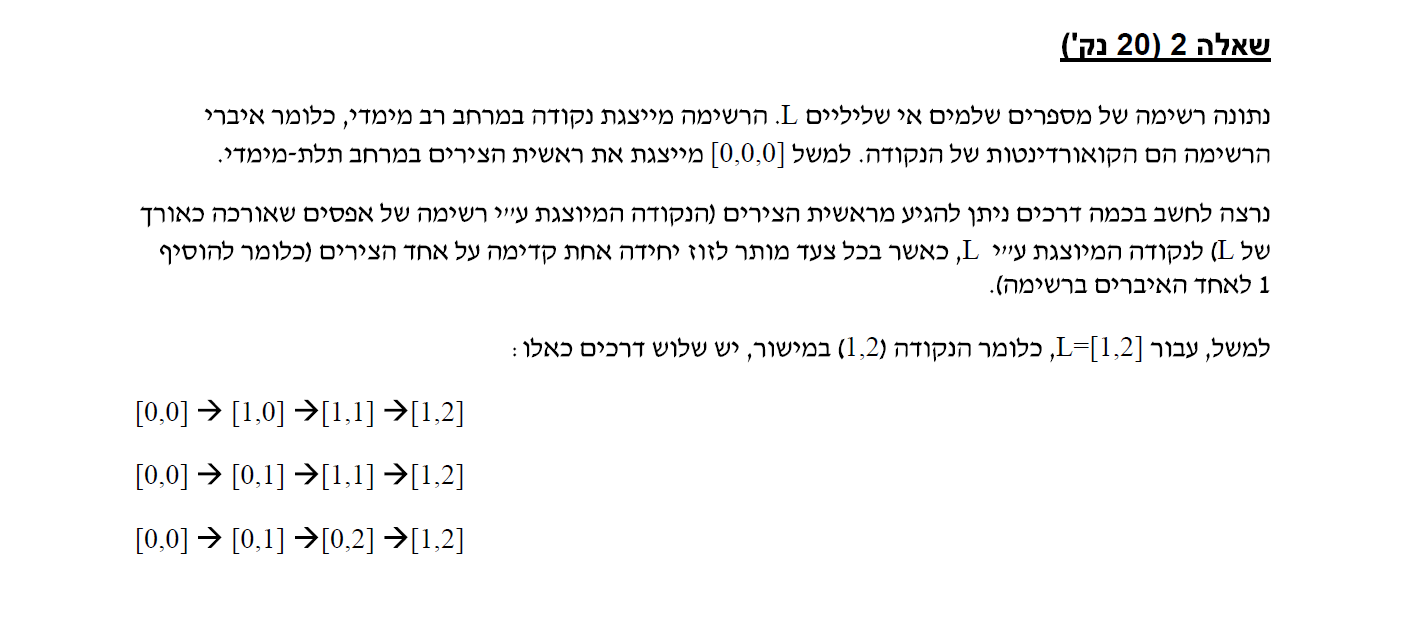

Again, we first think of the base case, and then reduce big problems to smaller ones.

* If $L$ has only zeros then there is a single possible path - not taking any steps.
* Otherwise, we have the following relation, let $L = [a_1, \ldots, a_n]$, then: $$paths([a_1, \ldots, a_n]) = \sum_{i : a_i > 0}paths([a_1,\ldots, a_i - 1, \ldots, a_n])$$

This gives rise to a simple recursive algorithm:

In [1]:
def cnt_paths(L):
    if all_zeros(L):
        return 1
    
    result = 0
    for i in range(len(L)):
        if L[i] != 0:
            L[i] -= 1
            result += cnt_paths(L)
            L[i] += 1
    return result

def all_zeros(L):
    for i in L:
        if i != 0:
            return False
    return True


print(cnt_paths([3,4,5]))

27720
